<a href="https://colab.research.google.com/github/marc1971/Assignement-Module4-CAS-NLP/blob/main/QnadA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install accelerate==0.20.3
!pip install transformers==4.30.1

In [ ]:
!pip install datasets evaluate

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('QA.xlsx')

In [ ]:
df.tail()

,id,title,question,answer,context,document,Unnamed: 6,Unnamed: 7,Unnamed: 8
1028,1029,Wegleitung BERUFSPRAKTISCHE AUSBILDUNG,"Woher bekomme ich das Formular, um ein Praktik...",Das Formular Abbruch Praktikum kann bei der Be...,Die Beteiligten gehen wie folgt vor: Schriftli...,Alle Studierenden des Instituts Sekundarstufe ...,NaN,NaN,NaN
1029,1030,Wegleitung BERUFSPRAKTISCHE AUSBILDUNG,"Was geschieht, wenn ich einen wichtigen Grund ...",Liegt ein wichtiger Grund für den Abbruch des ...,Die Beteiligten gehen wie folgt vor: Schriftli...,Alle Studierenden des Instituts Sekundarstufe ...,NaN,NaN,NaN
1030,1031,Wegleitung BERUFSPRAKTISCHE AUSBILDUNG,Kann ich mit einer ungenügenden Prüfungslektio...,Ein ungenügender Leistungsnachweis Prüfungslek...,Berufspraktische Arbeit wiederholt werden (vgl...,Alle Studierenden des Instituts Sekundarstufe ...,NaN,NaN,NaN
1031,1032,Wegleitung BERUFSPRAKTISCHE AUSBILDUNG,Gibt es am IS2 der Phbern ein Verfahren zur Pr...,Am IS2 der PHBern findet die Prüfung der Eignu...,Berufspraktische Arbeit wiederholt werden (vgl...,Alle Studierenden des Instituts Sekundarstufe ...,NaN,NaN,NaN
1032,1033,Wegleitung BERUFSPRAKTISCHE AUSBILDUNG,Ist das Einfühungspraktikum ein Einzelpraktikum?,Im Einführungspraktikum werden einer Praxisleh...,Berufspraktische Arbeit wiederholt werden (vgl...,Alle Studierenden des Instituts Sekundarstufe ...,NaN,NaN,NaN


In [ ]:
df  = df.iloc[: , :5]
for index, row in df.iterrows():
    main_string = str(row['context'])
    reference_text = row['answer']

# Find the starting position of the reference text
    position = main_string.find(reference_text)

    if position != -1:
        #print(position)#print(position)#(f"The reference text starts at position: {position}")
        df.loc[index, ['answer_start']]= str(position)
    else:
        #print("Reference text not found in the main string.")
        df.loc[index, ['answer_start']]= str('text not found')

In [ ]:
df.tail()

,id,title,question,answer,context,answer_start
1028,1029,Wegleitung BERUFSPRAKTISCHE AUSBILDUNG,"Woher bekomme ich das Formular, um ein Praktik...",Das Formular Abbruch Praktikum kann bei der Be...,Die Beteiligten gehen wie folgt vor: Schriftli...,139
1029,1030,Wegleitung BERUFSPRAKTISCHE AUSBILDUNG,"Was geschieht, wenn ich einen wichtigen Grund ...",Liegt ein wichtiger Grund für den Abbruch des ...,Die Beteiligten gehen wie folgt vor: Schriftli...,1048
1030,1031,Wegleitung BERUFSPRAKTISCHE AUSBILDUNG,Kann ich mit einer ungenügenden Prüfungslektio...,Ein ungenügender Leistungsnachweis Prüfungslek...,Berufspraktische Arbeit wiederholt werden (vgl...,532
1031,1032,Wegleitung BERUFSPRAKTISCHE AUSBILDUNG,Gibt es am IS2 der Phbern ein Verfahren zur Pr...,Am IS2 der PHBern findet die Prüfung der Eignu...,Berufspraktische Arbeit wiederholt werden (vgl...,833
1032,1033,Wegleitung BERUFSPRAKTISCHE AUSBILDUNG,Ist das Einfühungspraktikum ein Einzelpraktikum?,Im Einführungspraktikum werden einer Praxisleh...,Berufspraktische Arbeit wiederholt werden (vgl...,1464


In [ ]:
# Checking whether there are Answers not found in the Text-Chunks
df_fail = df[df['answer_start'] == 'text not found']
df_fail

,id,title,question,answer,context,answer_start


In [ ]:
from collections import defaultdict
from datasets import Dataset

# Initialize the Hugging Face Dataset-formatted data structure
huggingface_data = defaultdict(list)

# Iterate through DataFrame rows
for _, row in df.iterrows():
    paragraph = {
        'title': row['title'],
        'context': row['context'],
        'question': row['question'],
        'id': f"{row['id']}-qa-1",
        'answers': [
                    {
                        'text': row['answer'],
                        'answer_start': int(row['answer_start']),
                    }
                ],
         }

    # Append to Hugging Face Dataset-formatted data
    huggingface_data['id'].append(row['id'])
    huggingface_data['title'].append(row['title'])
    huggingface_data['context'].append(row['context'])
    huggingface_data['question'].append(row['question'])
    huggingface_data['answers'].append([
                {
                    'text': row['answer'],
                    'answer_start': int(row['answer_start']),
                }
        ])

# Create a dictionary with the Hugging Face Dataset-formatted data
huggingface_dataset_data = {
    'id': huggingface_data['id'],
    'title': huggingface_data['title'],
    'context': huggingface_data['context'],
    'question': huggingface_data['question'],
    'answers': huggingface_data['answers'],
}

# Convert to Hugging Face Dataset
my_dataset = Dataset.from_dict(huggingface_dataset_data)

# Print or inspect the dataset
print(my_dataset)

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 1033
})


In [ ]:
my_dataset = my_dataset.train_test_split(test_size=0.2)

In [ ]:
my_dataset


DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 826
    })
    test: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 207
    })
})

In [ ]:
from transformers import AutoTokenizer

# Load the German DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-german-cased")

# Example sentence
text = "Wie viele einzelne Fachlehrdiplome kann ich am IS1 erwerben?"

# Tokenize the sentence
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(text)))
print("Tokens:", tokens)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/240k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/479k [00:00<?, ?B/s]

Tokens: ['[CLS]', 'Wie', 'viele', 'einzelne', 'Fach', '##lehr', '##di', '##plo', '##me', 'kann', 'ich', 'am', 'IS', '##1', 'erwerben', '?', '[SEP]']


There are a few preprocessing steps particular to question answering tasks you should be aware of:

1. Some examples in a dataset may have a very long context that exceeds the maximum input length of the model. To deal with longer sequences, truncate only the context by setting truncation="only_second".
2. Next, map the start and end positions of the answer to the original context by setting return_offset_mapping=True.
3. With the mapping in hand, now you can find the start and end tokens of the answer. Use the sequence_ids method to find which part of the offset corresponds to the question and which corresponds to the context.

Here is how you can create a function to truncate and map the start and end tokens of the answer to the context:

In [ ]:
def preprocess_function(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=384,
        truncation="only_second",
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        answer = answers[i]

        start_char = answer[0]['answer_start']
        end_char = answer[0]['answer_start'] + len(answer[0]["text"])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label it (0, 0)
        if offset[context_start][0] > end_char or offset[context_end][1] < start_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [ ]:
my_dataset['train']['answers'][0][0]['text']

'Vergütet werden in jedem Fall ausschliesslich die Kosten für Billette zweiter Klasse.'

To apply the preprocessing function over the entire dataset, use 🤗 Datasets map function. You can speed up the map function by setting batched=True to process multiple elements of the dataset at once. Remove any columns you don’t need:

In [ ]:
tokenized_QA = my_dataset.map(preprocess_function, batched=True, remove_columns=my_dataset["train"].column_names)

Map:   0%|          | 0/826 [00:00<?, ? examples/s]

Map:   0%|          | 0/207 [00:00<?, ? examples/s]

In [ ]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

Now let's Train the model!

In [ ]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer

model = AutoModelForQuestionAnswering.from_pretrained("distilbert-base-german-cased")

model.safetensors:   0%|          | 0.00/270M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-german-cased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-german-cased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stre

In [ ]:
#training_args = TrainingArguments(
#    output_dir="./output",            # Specify the output directory
#    num_train_epochs=3,               # Number of training epochs
#    per_device_train_batch_size=16,   # Batch size per GPU
#    save_steps=1000,                   # Save model checkpoints every N steps
#    save_total_limit=2,                # Only keep the last N checkpoints
#    learning_rate=2e-5,                # Learning rate
#    evaluation_strategy="steps",       # Evaluation strategy during training ("steps" or "epoch")
#    eval_steps=500,                    # Evaluate every N steps
#    logging_dir="./logs",             # Directory for Tensorboard logs
#    logging_steps=100,                 # Log metrics every N steps
#    report_to="tensorboard",           # Report metrics to Tensorboard
#    load_best_model_at_end=True,       # Load the best model at the end of training
#)


training_args = TrainingArguments(
    output_dir="my_QA_model",
    evaluation_strategy="epoch",
    learning_rate=1e-4,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=20,
    weight_decay=0.01,
    push_to_hub=True,
    logging_steps = 2
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_QA["train"],
    eval_dataset=tokenized_QA["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:127: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
Cloning https://huggingface.co/Marc71/my_QA_model into local empty directory.


Download file pytorch_model.bin:   0%|          | 24.0k/255M [00:00<?, ?B/s]

Download file runs/Dec20_19-25-45_1d6bf6188205/events.out.tfevents.1703100348.1d6bf6188205.341.4:  83%|#######…

Download file runs/Dec18_15-46-18_80f8a814294b/events.out.tfevents.1702914382.80f8a814294b.369.1:  39%|###9   …

Download file runs/Dec20_19-18-49_1d6bf6188205/events.out.tfevents.1703099932.1d6bf6188205.341.2:  67%|######6…

Download file runs/Dec20_19-51-05_1d6bf6188205/events.out.tfevents.1703101868.1d6bf6188205.341.12: 100%|######…

Download file runs/Dec19_11-56-30_d912764aee27/events.out.tfevents.1702986993.d912764aee27.826.2:  12%|#1     …

Download file runs/Dec20_19-38-46_1d6bf6188205/events.out.tfevents.1703101129.1d6bf6188205.341.8:   4%|3      …

Clean file runs/Dec20_19-25-45_1d6bf6188205/events.out.tfevents.1703100348.1d6bf6188205.341.4:   3%|2         …

Download file runs/Dec19_10-45-56_d912764aee27/events.out.tfevents.1702982825.d912764aee27.826.0:  36%|###5   …

Clean file runs/Dec20_19-18-49_1d6bf6188205/events.out.tfevents.1703099932.1d6bf6188205.341.2:   3%|2         …

Clean file runs/Dec20_19-51-05_1d6bf6188205/events.out.tfevents.1703101868.1d6bf6188205.341.12:   4%|4        …

Clean file runs/Dec20_19-38-46_1d6bf6188205/events.out.tfevents.1703101129.1d6bf6188205.341.8:   3%|2         …

Clean file runs/Dec19_10-45-56_d912764aee27/events.out.tfevents.1702982825.d912764aee27.826.0:   1%|1         …

Clean file runs/Dec19_11-56-30_d912764aee27/events.out.tfevents.1702986993.d912764aee27.826.2:   0%|          …

Download file runs/Dec20_19-57-13_1d6bf6188205/events.out.tfevents.1703102236.1d6bf6188205.341.14: 100%|######…

Download file runs/Dec20_19-32-41_1d6bf6188205/events.out.tfevents.1703100764.1d6bf6188205.341.6: 100%|#######…

Clean file runs/Dec18_15-46-18_80f8a814294b/events.out.tfevents.1702914382.80f8a814294b.369.1:   2%|2         …

Download file runs/Dec20_20-03-25_1d6bf6188205/events.out.tfevents.1703102608.1d6bf6188205.341.16: 100%|######…

Clean file runs/Dec20_19-57-13_1d6bf6188205/events.out.tfevents.1703102236.1d6bf6188205.341.14:   4%|4        …

Download file training_args.bin: 100%|##########| 4.24k/4.24k [00:00<?, ?B/s]

Download file runs/Dec20_19-45-36_1d6bf6188205/events.out.tfevents.1703101539.1d6bf6188205.341.10: 100%|######…

Clean file runs/Dec20_19-32-41_1d6bf6188205/events.out.tfevents.1703100764.1d6bf6188205.341.6:   4%|4         …

Clean file runs/Dec20_20-03-25_1d6bf6188205/events.out.tfevents.1703102608.1d6bf6188205.341.16:   5%|4        …

Clean file training_args.bin:  24%|##3       | 1.00k/4.24k [00:00<?, ?B/s]

Clean file runs/Dec20_19-45-36_1d6bf6188205/events.out.tfevents.1703101539.1d6bf6188205.341.10:   7%|6        …

Download file runs/Dec20_19-11-32_1d6bf6188205/events.out.tfevents.1703099579.1d6bf6188205.341.0: 100%|#######…

Clean file runs/Dec20_19-11-32_1d6bf6188205/events.out.tfevents.1703099579.1d6bf6188205.341.0:   4%|4         …

Download file runs/Dec18_15-39-08_80f8a814294b/events.out.tfevents.1702913954.80f8a814294b.369.0: 100%|#######…

Clean file runs/Dec18_15-39-08_80f8a814294b/events.out.tfevents.1702913954.80f8a814294b.369.0:  14%|#4        …

Download file runs/Dec20_19-45-36_1d6bf6188205/events.out.tfevents.1703101865.1d6bf6188205.341.11: 100%|######…

Download file runs/Dec19_10-45-56_d912764aee27/events.out.tfevents.1702983915.d912764aee27.826.1: 100%|#######…

Clean file runs/Dec20_19-45-36_1d6bf6188205/events.out.tfevents.1703101865.1d6bf6188205.341.11: 100%|#########…

Clean file runs/Dec19_10-45-56_d912764aee27/events.out.tfevents.1702983915.d912764aee27.826.1: 100%|##########…

Download file runs/Dec20_19-51-05_1d6bf6188205/events.out.tfevents.1703102233.1d6bf6188205.341.13: 100%|######…

Clean file runs/Dec20_19-51-05_1d6bf6188205/events.out.tfevents.1703102233.1d6bf6188205.341.13: 100%|#########…

Download file runs/Dec20_19-32-41_1d6bf6188205/events.out.tfevents.1703101126.1d6bf6188205.341.7: 100%|#######…

Clean file runs/Dec20_19-32-41_1d6bf6188205/events.out.tfevents.1703101126.1d6bf6188205.341.7: 100%|##########…

Download file runs/Dec20_19-38-46_1d6bf6188205/events.out.tfevents.1703101536.1d6bf6188205.341.9: 100%|#######…

Clean file runs/Dec20_19-38-46_1d6bf6188205/events.out.tfevents.1703101536.1d6bf6188205.341.9: 100%|##########…

Download file runs/Dec20_19-11-32_1d6bf6188205/events.out.tfevents.1703099929.1d6bf6188205.341.1: 100%|#######…

Download file runs/Dec20_19-57-13_1d6bf6188205/events.out.tfevents.1703102605.1d6bf6188205.341.15: 100%|######…

Clean file runs/Dec20_19-11-32_1d6bf6188205/events.out.tfevents.1703099929.1d6bf6188205.341.1: 100%|##########…

Clean file runs/Dec20_19-57-13_1d6bf6188205/events.out.tfevents.1703102605.1d6bf6188205.341.15: 100%|#########…

Download file runs/Dec20_19-25-45_1d6bf6188205/events.out.tfevents.1703100761.1d6bf6188205.341.5: 100%|#######…

Download file runs/Dec20_19-18-49_1d6bf6188205/events.out.tfevents.1703100345.1d6bf6188205.341.3: 100%|#######…

Clean file runs/Dec20_19-25-45_1d6bf6188205/events.out.tfevents.1703100761.1d6bf6188205.341.5: 100%|##########…

Clean file runs/Dec20_19-18-49_1d6bf6188205/events.out.tfevents.1703100345.1d6bf6188205.341.3: 100%|##########…

Clean file pytorch_model.bin:   0%|          | 1.00k/255M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,2.821900,2.832140
2,2.853600,2.759555
3,3.023700,2.789637
4,2.591300,2.901590
5,2.103300,3.141779
6,1.920500,3.357306
7,1.682500,3.545279
8,1.601500,4.014106
9,1.081100,4.623302
10,0.795200,5.045400


TrainOutput(global_step=520, training_loss=1.300199320511176, metrics={'train_runtime': 620.9168, 'train_samples_per_second': 26.606, 'train_steps_per_second': 0.837, 'total_flos': 1618791909396480.0, 'train_loss': 1.300199320511176, 'epoch': 20.0})

# Neuer Abschnitt

In [ ]:
!pip install optuna

Automatic Optimazation

In [ ]:
import optuna

def objective(trial):
    # Define hyperparameters to search
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
    num_train_epochs = trial.suggest_int("num_train_epochs", 10, 20, 30)
    per_device_train_batch_size = trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32])
    per_device_eval_batch_size = trial.suggest_categorical("per_device_eval_batch_size", [8, 16, 32])

    # Define the training arguments
    training_args = TrainingArguments(
      output_dir="my_QA_model",
      evaluation_strategy="epoch",
      learning_rate=learning_rate,
      per_device_train_batch_size =per_device_train_batch_size,
      per_device_eval_batch_size=per_device_eval_batch_size,
      num_train_epochs=num_train_epochs,
      weight_decay=0.01,
      push_to_hub=True,
      logging_steps = 5
    )

    # Create and train the model
    #model = model
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_QA["train"],
        eval_dataset=tokenized_QA["test"],
        tokenizer=tokenizer,
        data_collator=data_collator,
    )
    trainer.train()

    # Return the metric to optimize (e.g., validation loss)
    return trainer.evaluate()["eval_loss"]

# Run the optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)  # Adjust n_trials based on your resources

# Access the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2023-12-20 19:11:32,699] A new study created in memory with name: no-name-e00ea015-b19e-4ab4-accd-56e2a76705b8
<ipython-input-21-05c83926cf6c>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
<ipython-input-21-05c83926cf6c>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  num_train_epochs = trial.suggest_int("num_train_epochs", 10, 20, 30)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [10, 20] and step=30, but the range is not divisible by `step`. It will be replaced by [10, 10].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:127: FutureWarning: 'Repository' (from

Download file pytorch_model.bin:   0%|          | 8.00k/255M [00:00<?, ?B/s]

Download file runs/Dec18_15-39-08_80f8a814294b/events.out.tfevents.1702913954.80f8a814294b.369.0: 100%|#######…

Download file runs/Dec18_15-46-18_80f8a814294b/events.out.tfevents.1702914382.80f8a814294b.369.1:  20%|#9     …

Download file runs/Dec19_10-45-56_d912764aee27/events.out.tfevents.1702982825.d912764aee27.826.0:  10%|9      …

Download file runs/Dec19_11-56-30_d912764aee27/events.out.tfevents.1702986993.d912764aee27.826.2:  15%|#5     …

Download file runs/Dec19_10-45-56_d912764aee27/events.out.tfevents.1702983915.d912764aee27.826.1: 100%|#######…

Download file training_args.bin: 100%|##########| 4.24k/4.24k [00:00<?, ?B/s]

Clean file runs/Dec18_15-39-08_80f8a814294b/events.out.tfevents.1702913954.80f8a814294b.369.0:  14%|#4        …

Clean file runs/Dec18_15-46-18_80f8a814294b/events.out.tfevents.1702914382.80f8a814294b.369.1:   2%|2         …

Clean file runs/Dec19_10-45-56_d912764aee27/events.out.tfevents.1702983915.d912764aee27.826.1: 100%|##########…

Clean file training_args.bin:  24%|##3       | 1.00k/4.24k [00:00<?, ?B/s]

Clean file runs/Dec19_10-45-56_d912764aee27/events.out.tfevents.1702982825.d912764aee27.826.0:   1%|1         …

Clean file runs/Dec19_11-56-30_d912764aee27/events.out.tfevents.1702986993.d912764aee27.826.2:   0%|          …

Clean file pytorch_model.bin:   0%|          | 1.00k/255M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,3.057900,2.989411
2,2.827100,3.007004
3,2.581600,3.085653
4,2.614200,3.118941
5,2.223000,3.571574
6,1.875300,3.647973
7,1.660700,4.091358
8,1.031300,5.098338
9,0.874600,5.889482
10,0.640800,6.258580


[I 2023-12-20 19:18:49,297] Trial 0 finished with value: 6.258580207824707 and parameters: {'learning_rate': 0.0003123123361257348, 'num_train_epochs': 10, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 32}. Best is trial 0 with value: 6.258580207824707.
<ipython-input-21-05c83926cf6c>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
<ipython-input-21-05c83926cf6c>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  num_train_epochs = trial.suggest_int("num_train_epochs", 10, 20, 30)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [10, 20] and step=30, but the range is not divisible by `step`. It will

Epoch,Training Loss,Validation Loss
1,0.933400,6.070759
2,0.608300,6.128512
3,0.431300,6.732644
4,0.577000,7.354724
5,0.734800,7.632932
6,0.347300,7.976381
7,0.250300,8.221990
8,0.466500,8.660349
9,0.360300,8.447996
10,0.405500,8.552385


[I 2023-12-20 19:25:45,336] Trial 1 finished with value: 8.552385330200195 and parameters: {'learning_rate': 5.4221884215168635e-05, 'num_train_epochs': 10, 'per_device_train_batch_size': 8, 'per_device_eval_batch_size': 32}. Best is trial 0 with value: 6.258580207824707.
<ipython-input-21-05c83926cf6c>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
<ipython-input-21-05c83926cf6c>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  num_train_epochs = trial.suggest_int("num_train_epochs", 10, 20, 30)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [10, 20] and step=30, but the range is not divisible by `step`. It will

Epoch,Training Loss,Validation Loss
1,0.601300,8.725435
2,0.189700,8.780140
3,0.218500,8.720838
4,0.500700,8.558758
5,0.323100,10.124038
6,0.264100,9.806782
7,0.212600,10.426562
8,0.312500,10.846352
9,0.195100,10.422195
10,0.374000,10.493046


[I 2023-12-20 19:32:41,940] Trial 2 finished with value: 10.493045806884766 and parameters: {'learning_rate': 0.00010018040763530024, 'num_train_epochs': 10, 'per_device_train_batch_size': 8, 'per_device_eval_batch_size': 32}. Best is trial 0 with value: 6.258580207824707.
<ipython-input-21-05c83926cf6c>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
<ipython-input-21-05c83926cf6c>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  num_train_epochs = trial.suggest_int("num_train_epochs", 10, 20, 30)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [10, 20] and step=30, but the range is not divisible by `step`. It wil

Epoch,Training Loss,Validation Loss
1,3.583100,3.688388
2,6.006400,5.950642
3,5.966900,5.950641
4,5.960100,5.950641
5,5.965000,5.950641
6,5.966800,5.950641
7,5.941600,5.950641
8,5.950500,5.950641
9,5.956200,5.950641
10,5.959000,5.950641


[I 2023-12-20 19:38:46,853] Trial 3 finished with value: 5.95064115524292 and parameters: {'learning_rate': 0.0009733588191516505, 'num_train_epochs': 10, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 32}. Best is trial 3 with value: 5.95064115524292.
<ipython-input-21-05c83926cf6c>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
<ipython-input-21-05c83926cf6c>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  num_train_epochs = trial.suggest_int("num_train_epochs", 10, 20, 30)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [10, 20] and step=30, but the range is not divisible by `step`. It will b

Epoch,Training Loss,Validation Loss
1,5.956900,5.950644
2,5.958200,5.950643
3,5.951000,5.950643
4,5.966900,5.950642
5,5.959900,5.950643
6,5.953500,5.950643
7,5.959500,5.950643
8,5.958000,5.950644
9,5.947500,5.950643
10,5.948200,5.950644


[I 2023-12-20 19:45:36,755] Trial 4 finished with value: 5.950643539428711 and parameters: {'learning_rate': 1.3156570872653283e-05, 'num_train_epochs': 10, 'per_device_train_batch_size': 8, 'per_device_eval_batch_size': 16}. Best is trial 3 with value: 5.95064115524292.
<ipython-input-21-05c83926cf6c>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
<ipython-input-21-05c83926cf6c>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  num_train_epochs = trial.suggest_int("num_train_epochs", 10, 20, 30)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [10, 20] and step=30, but the range is not divisible by `step`. It will 

Epoch,Training Loss,Validation Loss
1,5.950200,5.950642
2,5.962500,5.950644
3,5.945400,5.950644
4,5.953400,5.950643
5,5.958700,5.950643
6,5.963800,5.950642
7,5.955700,5.950642
8,5.959700,5.950643
9,5.958000,5.950644
10,5.951300,5.950642


[I 2023-12-20 19:51:05,583] Trial 5 finished with value: 5.950642108917236 and parameters: {'learning_rate': 0.0006247807129053615, 'num_train_epochs': 10, 'per_device_train_batch_size': 32, 'per_device_eval_batch_size': 16}. Best is trial 3 with value: 5.95064115524292.
<ipython-input-21-05c83926cf6c>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
<ipython-input-21-05c83926cf6c>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  num_train_epochs = trial.suggest_int("num_train_epochs", 10, 20, 30)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [10, 20] and step=30, but the range is not divisible by `step`. It will 

Epoch,Training Loss,Validation Loss
1,5.949500,5.950641
2,5.953600,5.950641
3,5.940900,5.950641
4,5.950700,5.950641
5,5.965000,5.950641
6,5.945600,5.950641
7,5.946100,5.950641
8,5.952800,5.950641
9,5.952300,5.950642
10,5.946100,5.950641


[I 2023-12-20 19:57:13,216] Trial 6 finished with value: 5.95064115524292 and parameters: {'learning_rate': 1.3582180644060865e-05, 'num_train_epochs': 10, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 32}. Best is trial 3 with value: 5.95064115524292.
<ipython-input-21-05c83926cf6c>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
<ipython-input-21-05c83926cf6c>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  num_train_epochs = trial.suggest_int("num_train_epochs", 10, 20, 30)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [10, 20] and step=30, but the range is not divisible by `step`. It will 

Epoch,Training Loss,Validation Loss
1,5.919300,5.950642
2,5.954100,5.950642
3,5.954600,5.950642
4,5.909200,5.950642
5,5.918600,5.950642
6,5.952400,5.950642
7,5.944300,5.950642
8,5.938800,5.950642
9,5.957200,5.950642
10,5.956900,5.950642


[I 2023-12-20 20:03:25,360] Trial 7 finished with value: 5.950641632080078 and parameters: {'learning_rate': 0.00037599774494535604, 'num_train_epochs': 10, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 8}. Best is trial 3 with value: 5.95064115524292.
<ipython-input-21-05c83926cf6c>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
<ipython-input-21-05c83926cf6c>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  num_train_epochs = trial.suggest_int("num_train_epochs", 10, 20, 30)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [10, 20] and step=30, but the range is not divisible by `step`. It will 

Epoch,Training Loss,Validation Loss
1,5.922800,5.950642
2,5.923300,5.950642
3,5.924500,5.950642
4,5.947100,5.950642
5,5.924300,5.950642
6,5.917800,5.950642
7,5.897500,5.950642
8,5.920100,5.950642
9,5.947200,5.950642
10,5.948700,5.950642


[I 2023-12-20 20:09:30,716] Trial 8 finished with value: 5.950641632080078 and parameters: {'learning_rate': 2.3339072691102535e-05, 'num_train_epochs': 10, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 8}. Best is trial 3 with value: 5.95064115524292.
<ipython-input-21-05c83926cf6c>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
<ipython-input-21-05c83926cf6c>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  num_train_epochs = trial.suggest_int("num_train_epochs", 10, 20, 30)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [10, 20] and step=30, but the range is not divisible by `step`. It will 

Epoch,Training Loss,Validation Loss
1,5.936900,5.950641
2,5.951300,5.950641
3,5.942000,5.950641
4,5.959900,5.950641
5,5.972500,5.950641
6,5.957300,5.950641
7,5.954900,5.950641
8,5.966000,5.950641
9,5.958700,5.950641
10,5.961700,5.950641


[I 2023-12-20 20:14:58,408] Trial 9 finished with value: 5.95064115524292 and parameters: {'learning_rate': 4.601520031568765e-05, 'num_train_epochs': 10, 'per_device_train_batch_size': 32, 'per_device_eval_batch_size': 32}. Best is trial 3 with value: 5.95064115524292.


Best Hyperparameters: {'learning_rate': 0.0009733588191516505, 'num_train_epochs': 10, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 32}


In [ ]:
results = trainer.evaluate(tokenized_QA["train"])
print(results)

{'eval_loss': 0.1090640053153038, 'eval_runtime': 9.4521, 'eval_samples_per_second': 87.388, 'eval_steps_per_second': 2.751, 'epoch': 20.0}


In [ ]:


# Assuming you have a Trainer object named 'trainer' after training

# Access the training logs
train_logs = trainer.state.log_history

print(train_logs)


[{'loss': 5.8726, 'learning_rate': 9.961538461538463e-05, 'epoch': 0.08, 'step': 2}, {'loss': 4.8433, 'learning_rate': 9.923076923076923e-05, 'epoch': 0.15, 'step': 4}, {'loss': 3.8022, 'learning_rate': 9.884615384615386e-05, 'epoch': 0.23, 'step': 6}, {'loss': 3.3545, 'learning_rate': 9.846153846153848e-05, 'epoch': 0.31, 'step': 8}, {'loss': 3.3291, 'learning_rate': 9.807692307692307e-05, 'epoch': 0.38, 'step': 10}, {'loss': 2.9324, 'learning_rate': 9.76923076923077e-05, 'epoch': 0.46, 'step': 12}, {'loss': 3.1077, 'learning_rate': 9.730769230769232e-05, 'epoch': 0.54, 'step': 14}, {'loss': 2.9457, 'learning_rate': 9.692307692307692e-05, 'epoch': 0.62, 'step': 16}, {'loss': 3.2108, 'learning_rate': 9.653846153846155e-05, 'epoch': 0.69, 'step': 18}, {'loss': 3.0267, 'learning_rate': 9.615384615384617e-05, 'epoch': 0.77, 'step': 20}, {'loss': 2.9368, 'learning_rate': 9.576923076923078e-05, 'epoch': 0.85, 'step': 22}, {'loss': 3.0767, 'learning_rate': 9.53846153846154e-05, 'epoch': 0.92

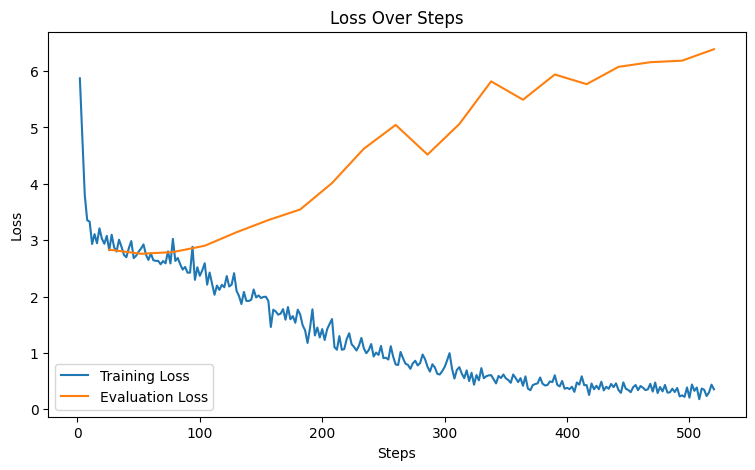

In [ ]:
import matplotlib.pyplot as plt
#train_loss = []
#for entry in train_logs:
#  if 'loss' in entry:
#    train_loss.append(entry['loss'])

#eval_loss = []
#for entry in train_logs:
#  if 'eval_loss' in entry:
#    eval_loss.append(entry['eval_loss'])

train_loss = [(entry["loss"], entry['step']) for entry in train_logs if "loss" in entry]
eval_loss = [(entry["eval_loss"], entry['step']) for entry in train_logs if "eval_loss" in entry]

X_t = []
Y_t = []
for x, y in train_loss:
  X_t.append(y)
  Y_t.append(x)

X_e = []
Y_e = []
for x, y in eval_loss:
  X_e.append(y)
  Y_e.append(x)

# Plot training loss
plt.figure(figsize=(9, 5))
plt.plot(X_t, Y_t, label='Training Loss')
plt.plot(X_e[:-1], Y_e[:-1], label='Evaluation Loss')
plt.title('Loss Over Steps')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()


Inference

In [ ]:
question = "Wie genau muss ich die Arbeitszeit erfassen?"
context = "Der Pausenort ist frei wählbar. Versäumte Pausen dürfen nicht nachbezogen werden. Die Mitglieder der Schulleitung, die Dozierenden und die Praxislehrpersonen erfassen ihre Arbeitszeit nicht. Im Übrigen gilt Artikel 18 PHV. Die Arbeitszeit wird grundsätzlich uhrzeitbasierend erfasst. Zu erfassen sind jeder Arbeitsbeginn und jedes Arbeitsende sowie sämtliche nennenswerten Unterbrüche mit Ausnahme der bezahlten Pausen. Bei ganztägigen Abwesenheiten zulasten der Arbeitszeit, namentlich wegen Ferien, Urlaub, Krankheit, Unfall oder Militärdienst, wird direkt die tägliche bzw. für den betreffenden Tag vereinbarte Sollarbeitszeit angegeben. Bei wöchentlichen Abwesenheiten zulasten der Arbeitszeit wird von Montag bis Freitag stets die tägliche Sollarbeitszeit gemäss Beschäftigungsgrad angegeben. Die Arbeitszeit wird auf fünf Minuten genau angegeben. Bis zwei Minuten wird auf null ab- und ab drei Minuten auf fünf Minuten aufgerundet. Die Arbeitszeiterfassung erfolgt möglichst am Ende des Arbeitstags, spätestens jedoch am Ende des ersten Arbeitstags der Folgewoche. Am Monatsende ist die Arbeitszeiterfassung spätestens am Ende des zweiten Werktags des Folgemonats abzuschliessen; planbare Abwesenheiten wie Ferien, Urlaub oder Militärdienst sind im Voraus zu erfassen. Die Vorgesetzten visieren die Arbeitszeiten bis spätestens am vierten Werktag des Folgemonats um 12 Uhr direkt im Zeiterfassungssystem. Sie sind für die Stellvertretung im Verhinderungsfall besorgt. Der Aufgabenbereich PFC informiert frühzeitig über allfällige besondere Termine betreffend das Erfassen und Visieren der Arbeitszeit. Ausnahmen von den in dieser Weisungen verankerten Grundsätzen werden im Zeiterfassungssystem unter «Notiz» vermerkt."

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("my_QA_model")
inputs = tokenizer(question, context, return_tensors="pt")

In [ ]:
import torch
from transformers import AutoModelForQuestionAnswering

model = AutoModelForQuestionAnswering.from_pretrained("my_QA_model")
with torch.no_grad():
    outputs = model(**inputs)

In [ ]:
answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()

In [ ]:
predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index + 1]
tokenizer.decode(predict_answer_tokens)

'Die Arbeitszeit wird auf fünf Minuten genau angegeben. Bis zwei Minuten wird auf null ab - und ab drei Minuten auf fünf Minuten aufgerundet. Die'